In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time, timedelta

In [2]:
# Load the CSV data into a Pandas DataFrame
df = pd.read_csv('combined.csv')
df.dtypes

User_Name                     object
Computer_Name                 object
Version                       object
Program_Name                  object
Date_Used                     object
Utilization_Time              object
Initializations_of_program     int64
dtype: object

In [3]:
df.head()

,User_Name,Computer_Name,Version,Program_Name,Date_Used,Utilization_Time,Initializations_of_program
0,Soni,DESKTOP-VIQ3V6T,Acrobat,Acrobat.exe,3/15/2023 17:59,1:00:58,1
1,Soni,DESKTOP-VIQ3V6T,Acrobat,Acrobat.exe,3/16/2023 18:10,0:01:12,2
2,Soni,DESKTOP-VIQ3V6T,Acrobat,Acrobat.exe,3/17/2023 18:22,1:01:20,3
3,Soni,DESKTOP-VIQ3V6T,Acrobat,Acrobat.exe,3/18/2023 18:33,0:01:08,4
4,Soni,DESKTOP-VIQ3V6T,Acrobat,Acrobat.exe,3/19/2023 18:47,1:02:05,5


In [4]:
# remove (".exe") from program's name for cleaner look
df['Program_Name'] = df['Program_Name'].str.strip('.exe')
df['Program_Name']

0      Acrobat
1      Acrobat
2      Acrobat
3      Acrobat
4      Acrobat
        ...   
97        Zoom
98        Zoom
99        Zoom
100       Zoom
101       Zoom
Name: Program_Name, Length: 102, dtype: object

In [5]:
# total utilization time for all programs
# convert utilization_time object to datetime object
df['Utilization_Time'] = pd.to_datetime(df['Utilization_Time'])
# convert to timedelta format
df['Utilization_Time'] = df['Utilization_Time'].apply(lambda x: timedelta(hours=x.hour, minutes=x.minute, seconds=x.second))
# Sum all rows
total_utilization_time = df['Utilization_Time'].sum()
total_utilization_time

Timedelta('7 days 19:39:45')

In [6]:
# Group the data by program name and calculate the sum of utilization time for each program
program_time = df.groupby('Program_Name')['Utilization_Time'].sum()
program_time

Program_Name
ACValhalla       0 days 15:26:23
Acrobat          0 days 09:36:41
EXCEL.EXE        1 days 19:23:01
MySQLWorkbench   0 days 13:45:00
Spider-Man       0 days 08:48:05
Spotify          1 days 07:55:49
Zoom             0 days 08:10:54
mpc-b            0 days 08:50:31
notepad++        0 days 16:39:25
tabpublic        1 days 07:03:56
Name: Utilization_Time, dtype: timedelta64[ns]

In [7]:
# shows every program's time percentage for whole month
percentage = program_time / total_utilization_time
percentage

Program_Name
ACValhalla        0.082274
Acrobat           0.051216
EXCEL.EXE         0.231179
MySQLWorkbench    0.073270
Spider-Man        0.046900
Spotify           0.170147
Zoom              0.043598
mpc-b             0.047116
notepad++         0.088760
tabpublic         0.165539
Name: Utilization_Time, dtype: float64

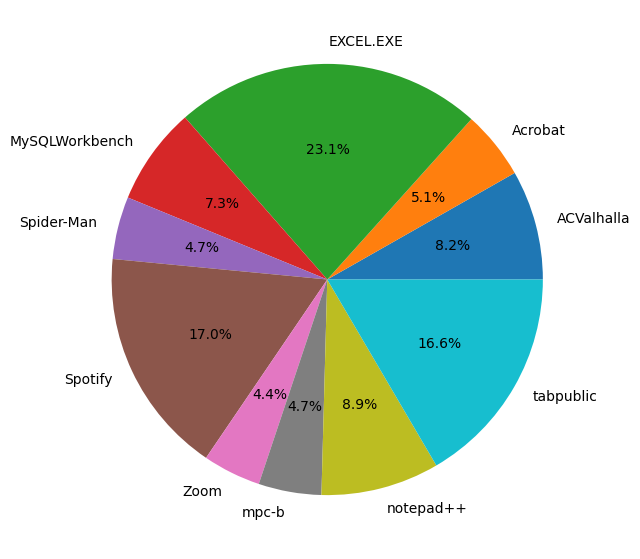

In [8]:
# create a pie chart , it's labels is resulting series index (which represents the program name)
plt.pie(percentage, labels=percentage.index, autopct="%1.1f%%")
plt.gcf().set_size_inches(7, 7)
plt.gca().set_aspect('equal')
plt.show()

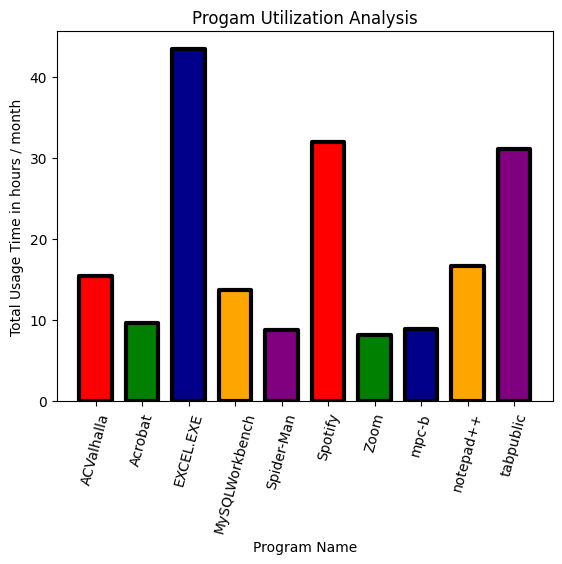

In [12]:
# dt.total_seconds() function transforms deltatime to seconds 
# we divided by 3600 to convert from seconds to hours
colors = ['red', 'green', 'darkblue', 'orange', 'purple']
bars = plt.bar(program_time.index, program_time.dt.total_seconds() / 3600, edgecolor='black',color=colors ,width=0.7, linewidth=3, joinstyle='round')
plt.xlabel('Program Name')
plt.ylabel('Total Usage Time in hours / month')
plt.title('Progam Utilization Analysis')
plt.xticks(rotation=75)
plt.show()